# Практическая работа 2.1. Анализ данных с помощью DASK


**Задание.**

`2.1.1.` Настроить среду и рабочий каталог.

`2.1.2.` Загрузить данные.

`2.1.3.` Проверить качество данных (например, отсутствующие значения и выбросы).

`2.1.4.` Удалить столбцы (множество пропусков в значениях, бесполезные столбцы для анализа).

`2.1.1.` **Настроить среду и рабочий каталог.**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
ls

drive/  sample_data/


In [8]:
!pip install "dask[complete]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.2 MB/s eta 0:00:00


In [9]:
# import libraries
import sys
import os

## import dask libraries
import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# import libraries
import pandas as pd

In [10]:
cwd = os.getcwd()

# print
print('', sys.executable)
print('', cwd)

 /usr/bin/python3
 /content


`2.1.2.` **Загрузить данные.**

In [11]:
df = dd.read_csv('/content/drive/MyDrive/Проектный практикум по ETL/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=32,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,string,string,string,int64,int64,int64,int64,float64,int64,int64,int64,string,string,string,float64,string,string,float64,string,string,int64,int64,string,string,string,string,string,string,float64,int64,string,int64,string,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
dtype = {
    'House Number': 'object',
    'Time First Observed': 'object'
}

In [12]:
df = dd.read_csv('/content/drive/MyDrive/Проектный практикум по ETL/Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
    dtype=dtype
)

In [13]:
df.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,<NA>,0,<NA>,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,...,GY,NaN,2001,<NA>,0,<NA>,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,...,BK,NaN,2004,<NA>,0,<NA>,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,...,WH,NaN,2007,<NA>,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,...,WHITE,NaN,2007,<NA>,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN
5,5096917368,FZD8593,NY,PAS,06/13/2017,7,SUBN,ME/BE,V,0,...,WH,NaN,2012,<NA>,0,<NA>,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
6,1413609545,X20DCM,NJ,PAS,08/03/2016,40,SDN,TOYOT,P,54070,...,WHITE,0.0,0,-,1,<NA>,<NA>,NaN,NaN,NaN
7,4628525523,326SF9,MA,PAS,12/21/2016,36,UT,BMW,V,0,...,<NA>,NaN,2001,<NA>,0,<NA>,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
8,4627113330,HCA5464,NY,OMS,11/21/2016,36,SUBN,DODGE,V,0,...,BK,NaN,2016,<NA>,0,<NA>,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
9,4006478550,VAD7274,VA,PAS,10/05/2016,5,4D,BMW,V,0,...,BLK,NaN,2008,<NA>,0,<NA>,BUS LANE VIOLATION,NaN,NaN,NaN


In [ ]:
## read data using DataFrame API
df = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
df

Обратите внимание, что

- `metadata` отображаются в кадре вместо образца данных
синтаксис очень похож на API Pandas.

- `# partitions` — это количество разбиений, используемых для разделения основного набора данных. Оптимальное количество определяется планировщиком, который разделяет `DataFrame Pandas` на более мелкие фрагменты. В этом случае размер каждого раздела составляет ~64 МБ (т. е. размер набора данных/npartitions = 2 ГБ/33). Если у нас есть один рабочий процесс, Dask будет переключаться на каждый раздел по одному.

- `data types` сообщаются под каждым именем столбца (аналогично описанию метода в Pandas, однако выполняется путем случайной выборки, поскольку данные разбросаны по нескольким физическим машинам). Хорошей практикой является явное определение типов данных вместо того, чтобы полагаться на вывод Dask (в идеале хранить в двоичном формате).

- `Dask Name` сообщает имя группы обеспечения доступности баз данных (т.е. с задержкой).

- `# tasks` — это количество узлов в группе, которые обеспечивают доступность к данным. Вы можете представить задачу как функцию `Python`, и в этом случае каждая задача выполняет три задачи:

1) чтение необработанных данных,

2) разделение данных на соответствующие блоки,

3) инициализация объекта `DataFrame`.

`2.1.3.` **Проверить качество данных (например, отсутствующие значения и выбросы).**

In [14]:
# count missing values
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
Dask Name: sum, 5 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(4d4d1e8)))).sum()

In [15]:
result = df.compute()
print(result)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


        Summons Number Plate ID Registration State Plate Type  Issue Date  \
0           5092469481  GZH7067                 NY        PAS  07/10/2016   
1           5092451658  GZH7067                 NY        PAS  07/08/2016   
2           4006265037  FZX9232                 NY        PAS  08/23/2016   
3           8478629828  66623ME                 NY        COM  06/14/2017   
4           7868300310  37033JV                 NY        COM  11/21/2016   
...                ...      ...                ...        ...         ...   
352313      1415891400  HGK6453                 NJ        PAS  11/02/2068   
352314      1384716543  GRA6240                 NY        PAS  07/12/2069   
352315      1413536554   RC8S28                 PA        PAS  08/14/2069   
352316      1415514203  HGU9544                 NY        PAS  11/15/2069   
352317      1415995370  GPP1608                 NY        PAS  11/19/2069   

        Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
0  

Обратите внимание на то, что:

Созданный объект `dask` представляет собой серию, содержащую метаданные, а синтаксис очень похож на `API Pandas`, обработка еще не завершена, вместо этого `Dask` подготовил `DAG`, сохраненный в переменной пропущенных значений (преимущество быстрого построения графика без необходимости ждать вычислений)

Количество задач увеличилось, поскольку были добавлены `2` задачи (т. е. проверка недостающих значений и суммы) для каждого из `32` разделов, а также окончательное добавление для агрегирования результатов по всем разделам, в общей сложности их - `4`.

In [16]:
# calculate percent missing values
mysize = df.index.size
missing_count = ((missing_values / mysize) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
Dask Name: mul, 9 expressions
Expr=(~ NotNull(frame=ArrowStringConversion(frame=FromMapProjectable(4d4d1e8)))).sum() / Index(frame=ArrowStringConversion(frame=FromMapProjectable(4d4d1e8))).size() * 100

Обратите внимание на то, что:

- созданный объект `dask` представляет собой серию, и вычисление еще не завершено.

- `df.index.size` — это объект `dask` `dask.dataframe.core.Scalar`. Вы не можете получить доступ к его значению/длине напрямую, как если бы вы это делали со списком (например, `len()`). Это противоречило бы всей идее `dask` (т.е. прочитать весь набор данных).

- `# tasks` количество задач увеличилось, так как были добавлены `2` задачи (т.е. деление и умножение).

-  `data type` изменен с `int64` на `float64`. Dask автоматически преобразовал его, если тип данных на выходе  не совпадает с входным после разделения.

In [17]:
# запуск вычисления, используя метод подсчета
with ProgressBar():
  missing_count_percent = missing_count.compute()
missing_count_percent

[                                        ] | 0% Completed | 5.84 s

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 140.00 s


,0
Summons Number,0.000000
Plate ID,0.006739
Registration State,0.000000
Plate Type,0.000000
Issue Date,0.000000
Violation Code,0.000000
Vehicle Body Type,0.395361
Vehicle Make,0.676199
Issuing Agency,0.000000
Street Code1,0.000000


Обратите внимание на то, что:

- метод `.compute()` необходим для запуска действий, встроенных в каждый узел группы обеспечения доступности баз данных.

- Результаты метода вычислений сохраняются в серии `Pandas`.

- `ProgressBar()` — это оболочка для отслеживания запущенных задач. Он показывает завершенную работу.

Видим, что не все столбцы являются неполными, и нам следует их удалить.

`2.1.4.` **Удалить столбцы (пропуски в значениях, бесполезные столбцы для анализа).**

In [19]:
# Получаем список столбцов, которые нужно удалить
columns_to_drop = missing_count_percent[missing_count_percent > 60].index

# Проверяем, что columns_to_drop не пуст
if not columns_to_drop.empty:
    print("Столбцы для удаления:", columns_to_drop)

    # Удаляем столбцы
    with ProgressBar():
        df_dropped = df.drop(columns=columns_to_drop).compute()
else:
    print("Нет столбцов для удаления.")
    df_dropped = df.compute()

Столбцы для удаления: Index(['Time First Observed', 'Intersecting Street', 'Violation Legal Code',
       'Unregistered Vehicle?', 'Meter Number',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')
[#######                                 ] | 18% Completed | 29.94 s

/usr/local/lib/python3.11/dist-packages/dask/dataframe/io/csv.py:199: DtypeWarning: Columns (18,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


[########################################] | 100% Completed | 132.93 s


Обратите внимание на то, что:

- использовать `Pandas Series` для удаления столбцов в `Dask DataFrame`, поскольку каждый раздел является `Pandas DataFrame`.

- В случае, если серия доступна для всех потоков, в кластере она будет сериализована и широковещательно передана всем рабочим узлам.

- Метод `.persist()` позволяет хранить в памяти промежуточные вычисления, чтобы их можно было использовать повторно.

# Практическая работа 2.2. Визуализация ориентированных ациклических графов (DAG)

- `DASK` использует библиотеку `Graviz` для создания визуального представления групп `DAG`, созданных планировщиком.

- и спользуйте метод `.visualize()` для проверки групп `DAG DataFrames`, `Series`, `Bag` и массивов.

Для упрощения будем использовать объект `Dask Delayed` вместо `DataFrames`, поскольку они становятся довольно большими и их трудно визуализировать.

- `Delayed` — это конструктор, который позволяет обертывать функции и создавать объекты `Dask Delayed`, эквивалентные узлу в `DAG`. Объединяя захваченные объекты, создаем группу доступа к данным.

Ниже приведены два примера: в первом  `DAG` только с одним узлом и зависимостями, а во втором  - `DAG` с несколькими узлами и зависимостями.

**Задание.**

`2.2.1.` Визуализировать `DAG` с одним узлом и зависимостями.

`2.2.1.` Визуализировать `DAG` с более чем одним узлом и зависимостями.



`2.1.1.` **Визуализировать `DAG` с одним узлом и зависимостями.**

In [32]:
# import library
import dask.delayed as delayed

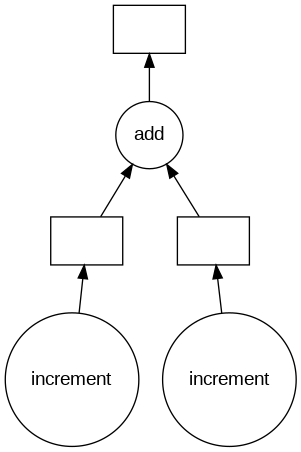

In [34]:
def increment(i):
    return i + 1

def add(x, y):
    return x + y

# функции переноса внутри отложенного объекта и цепочки
x = delayed(increment)(1)
y = delayed(increment)(2)
z = delayed(add)(x, y)

# visualize the DAG
z.visualize()

In [35]:
# show the result
z.compute()

5

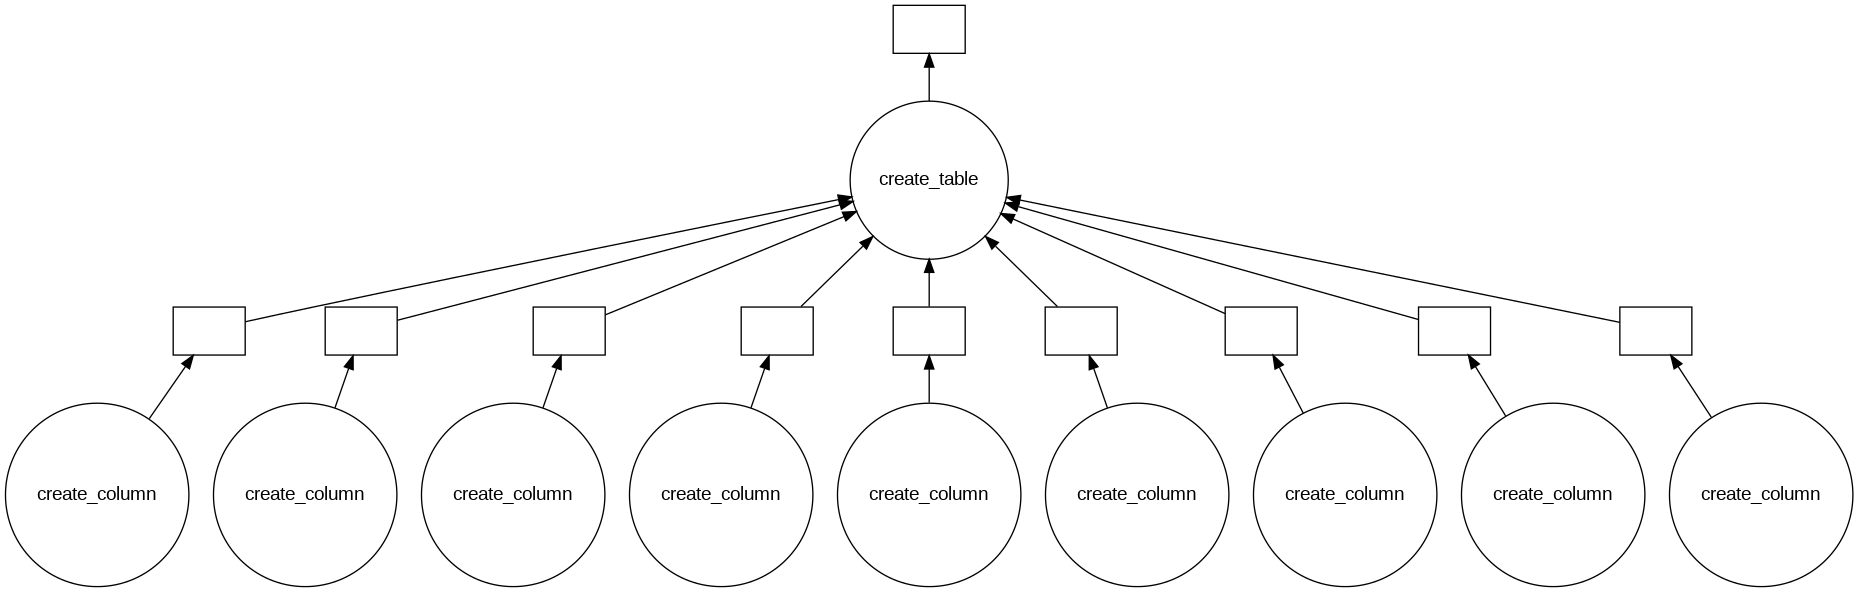

In [29]:
# Создаем отложенные вычисления для каждого столбца
@delayed
def create_column(column_name):
    return f"Column: {column_name}"

# Список столбцов таблицы
columns = [
    "Номер повестки", "Государство регистрации", "Тип номерного знака", "Дата выдачи",
 "Код нарушения", "Марка транспортного средства", "Цвет транспортного средства", "Почтовый индекс нарушения", "Описание нарушения"
]

# Создаем отложенные объекты для каждого столбца
delayed_columns = [create_column(columns) for column in columns]

# Создаем отложенный объект для таблицы, которая зависит от всех столбцов
@delayed
def create_table(columns):
    return "Штраф: " + ", ".join(columns)

# Таблица зависит от всех столбцов
delayed_penalty = create_table(delayed_columns)

# Визуализация DAG
delayed_penalty.visualize()

In [37]:
# show the result
delayed_penalty.compute()

'Штраф'

Обратите внимание на то, что:

- Чтобы построить узел, в функцию передали захваченный объект, а затем передали аргументы этой функции. Можно использовать декораторы.

- Круги указывают на функцию и вычисления, а квадраты — промежуточный или конечный результат.

- Входящие стрелки представляют зависимости. Функция `increment` не имеет никаких зависимостей, а функция `add` — две. Таким образом, функция `add`  должна ждать, пока не будут вычислены объекты `x` и `y`.

- Функции без зависимостей могут вычисляться независимо, и каждой из них можно назначить `workera`.

- Используйте метод `.visualize()` на последнем узле с зависимостями.

- `Dask` не расчитывает `DAG`. Используйте метод `.compute()` на последнем узле, чтобы увидеть результат.

`2.2.2.` **Визуализировать `DAG` с более чем одним узлом и зависимостями.**

построить более сложную группу `DAG` с двумя уровнями:

- `Layer1` создается путем циклического перебора списка данных  в ​`​dask` . Этот слой объединяет ранее созданное приращение функции со значениями в списке, а затем использует встроенное суммирование функции для объединения результатов;

- `Layer2` построен циклически для каждого объекта, созданного в `Layer1`.

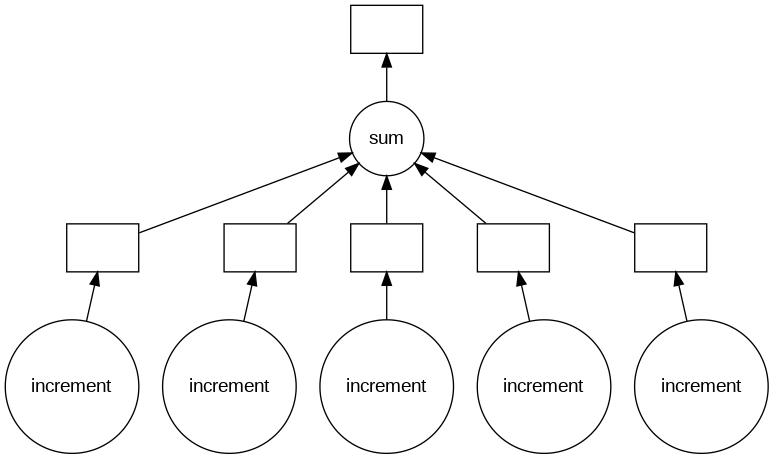

In [22]:
data = [1, 2, 3, 4, 5]

# compile first layer and visualize
layer1 = [delayed(increment)(i) for i in data]
total1 = delayed(sum)(layer1)
total1.visualize()

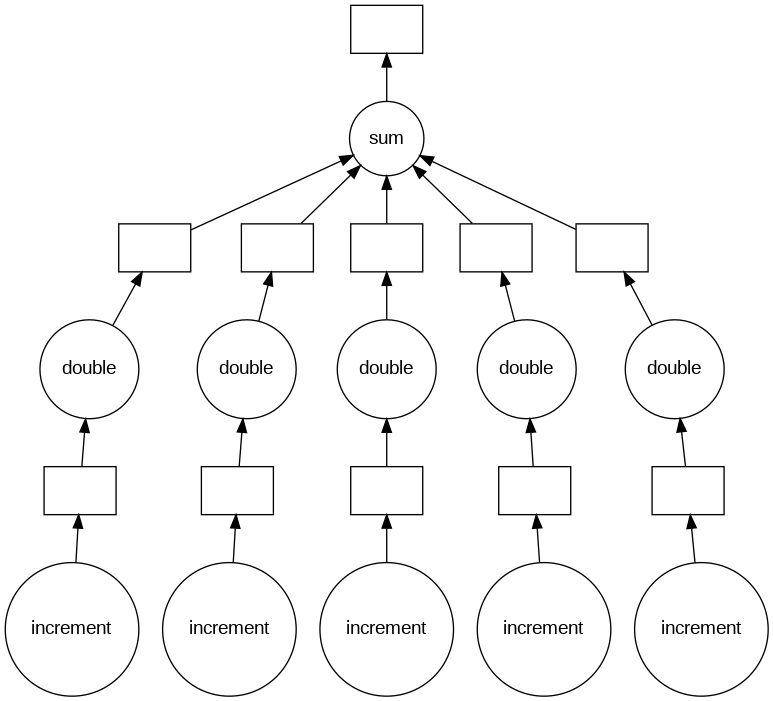

In [23]:
def double(x):
    return x * 2

# compile second layer and visualize
layer2 = [delayed(double)(j) for j in layer1]
total2 = delayed(sum)(layer2)#.persist()
total2.visualize()

In [24]:
z = total2.compute()
z

40

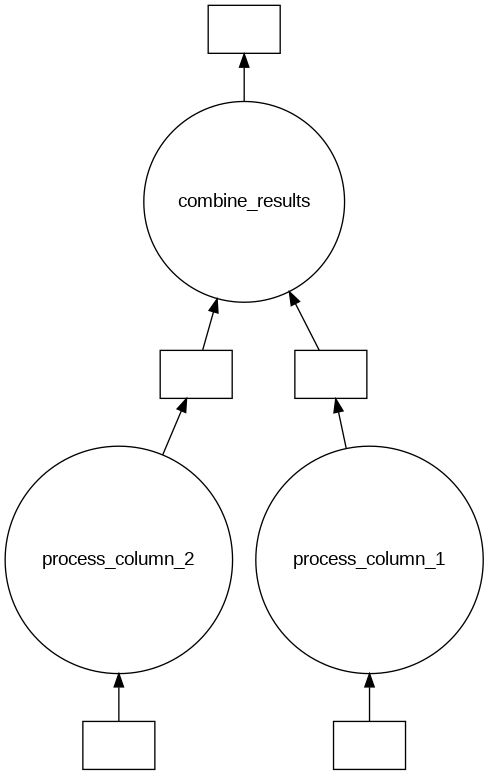

In [38]:
# Импортируем необходимые библиотеки
from dask import delayed
import dask

# Список столбцов таблицы
columns = [
    "Номер повестки", "Государство регистрации", "Тип номерного знака", "Дата выдачи",
    "Код нарушения", "Марка транспортного средства", "Цвет транспортного средства",
    "Почтовый индекс нарушения", "Описание нарушения"
]

# Создаем отложенные объекты для каждого столбца
delayed_columns = {column: delayed(column) for column in columns}

# Создаем узлы для обработки данных
@delayed
def process_column_1(data):
    return f"Обработано: {data}"

@delayed
def process_column_2(data):
    return f"Обработано: {data}"

@delayed
def combine_results(result1, result2):
    return f"Объединенный результат: {result1}, {result2}"

# Обрабатываем два столбца
processed_1 = process_column_1(delayed_columns["Номер повестки"])
processed_2 = process_column_2(delayed_columns["Государство регистрации"])

# Объединяем результаты обработки
combined_result = combine_results(processed_1, processed_2)

# Визуализация DAG
combined_result.visualize()


In [39]:
combined_result.compute()

'Объединенный результат: Обработано: Номер повестки, Обработано: Государство регистрации'

Обратите внимание на то, что:

- построение через использование функции,

- используем `.persist()`, и результат будет представлен на графике в виде прямоугольника.

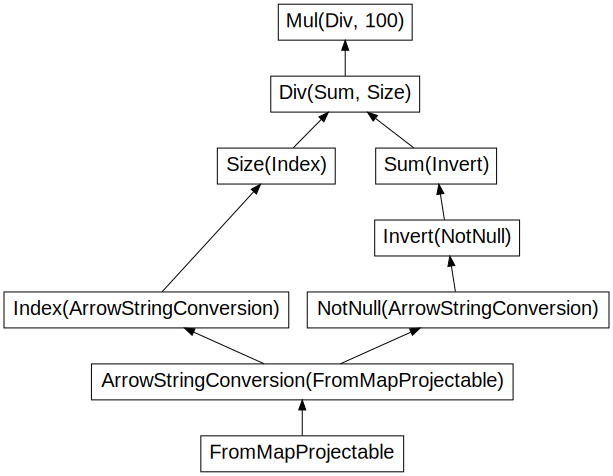

In [25]:
# visualize DAGs built from the DataFrame
missing_count.visualize()

# Самостоятельная работа

Каталог датасетов [тут](https://disk.yandex.ru/d/fbPE3VNKYocd7g). Прямая ссылка https://disk.yandex.ru/d/fbPE3VNKYocd7g.

Выполнить пункты

`2.1.1.` - `2.1.4.`,

`2.2.1.` - `2.2.2.`,

по вариантам:

01. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
02. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
03. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
04. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
05. `UK Property Price official data 1995-202304.zip`.
06. `Austin, TX House Listings.zip`.
07. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
08. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
09. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
10. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
11. `UK Property Price official data 1995-202304.zip`.
12. `Austin, TX House Listings.zip`.
13. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
14. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
15. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
16. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
17. `UK Property Price official data 1995-202304.zip`.
18. `Austin, TX House Listings.zip`.
19. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.
20. `Parking_Violations_Issued_-_Fiscal_Year_2015.csv`.
21. `Parking_Violations_Issued_-_Fiscal_Year_2016.csv`.
22. `Parking_Violations_Issued_-_Fiscal_Year_2017.csv`.
23. `UK Property Price official data 1995-202304.zip`.
24. `Austin, TX House Listings.zip`.
25. `Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv`.




